## Aprendendo o básico para trabalhar com Drive no Python

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir()

['Python_Leandro.ipynb',
 'PythonBasics.ipynb',
 'functions.ipynb',
 'args e kwargs.ipynb',
 'Pandas.ipynb',
 'Matplotlib_basics.ipynb',
 'loops.ipynb',
 'NumPy.ipynb',
 'Validador de CPF - FGVentos - 29 08 19.ipynb',
 'Trabalhando com Mapas.ipynb',
 'ipynb.py',
 'CRIMES_V2.ipynb',
 'Trabalho_de_Análise_Preditiva_Avançada.ipynb',
 'Sena (1).ipynb',
 'Sena.ipynb',
 'PacMan.ipynb',
 'training-blank (1).ipynb',
 'training-blank.ipynb',
 'Trabalho - Deep Learning - FGV (XP Inc).ipynb',
 'Trabalho_Deep_Learning_FGV_(XP_Inc).ipynb',
 'INTELIGÊNCIA ARTIFICIAL E FERRAMENTAS AVANÇADAS  DE CIÊNCIA DE DADOS (4H).ipynb',
 'EnviaMsgWhatsApp.ipynb',
 'Aula Modelagem Estatística Avançada - Mirapalheta 04 02 21.ipynb',
 'Aula de Modelagem Estatística avançada - Mirapalheta 04 02 2021 .ipynb',
 'Aula 10 02 2021 - Mirapalheta.ipynb',
 'mpg.csv']

## Importando o R para o ambiente

In [ ]:
from rpy2 import ipython
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R 

install.packages("ggplot2")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3058840 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

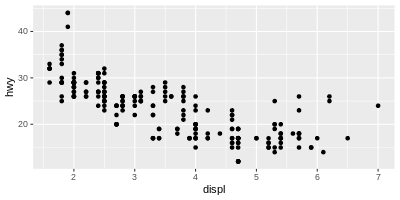

In [ ]:
%%R -w 400 -h 200

library(ggplot2)

ggplot(mpg, aes(x=displ, y=hwy)) + geom_point() 

In [ ]:
%%R 

write.csv(mpg, "mpg.csv", row.names=FALSE) 

In [ ]:
import pandas as pd
dados = pd.read_csv("mpg.csv")

In [ ]:
dados.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Regrssão linear via scikit-learn

Recomendação de leitura: Science Fictions, Stuart Ritchie
  + Sobre utilização do conceito de p-valor
  + O conceito de p-valor é de difícil entendimento e mais difícil ainda é sua correta utilização
  + O conceito envolve as seguintes etapas:
    + 1) Pensar em uma hipótese (isto é um modelo)
    + 2) Obter uma amostra das variáveis na população e a partir dela, calcular o p-valor
    + 3) O p-valor vai te dar a probabilidade de vc ter obtido o resultado que obteve, não por causa de uma correlação entre as suas variáveis, mas sim, decorrente do acaso.

  + Considere agora o seguinte cenário:
    + é feita uma amostragem de várias variáveis
    + são propostos vários modelos com diferentes variáveis de entrada e saída
    + é calculado para cada um deles o seu p-valor
    + em seguida são declarados "interessantes" aqueles modelos que tiverem um p-valor abaixo de 5% (ou de uma linha de corte qualquer)

  + Vamos comparar agora, através de um exemplo do dia a dia as duas situações descritas acima. SUponha que você está praticando tiro ao alvo.
    + Na primeira situação você pega a arma, olha o alvo (distante) e atira. Depois vai no alvo e verifica se os tiros acertaram o local desejado. Se você acertou, você é um bom atirador.
    + Na segunda situação você pega a arma, não olha o local onde vai atirar e dispara a esmo. Depois você vai na parede e marca com um "X" os locais onde suas balas acertaram, declarando que atingiu o alvo. Pergunta: Este segundo atirador é um "sharp-shooter"?

    

Vamos pensar agora na criação de modelos de previsão dentro da ótica de machine learning

  + Divisão imediata dos dados, logo depois de sua coleta, em grupos de treino e teste! O modelo é ajustado no treino e depois ele será validado ou não dependendo do seu desempenho no grupo de teste!
  + O critério de desempenho do modelo não é mais o p-valor e sim medidas ligadas a qualidade das suas previsões. No caso de regressão linear, MSE (erro quadrado médio ) e MAE (erro absoluto médio). No caso de regressão logística temos os vários critérios de erro ligados a uma matriz de confusão.

  

### Modelo de regressão linear simples:

In [ ]:
import numpy as np
import pandas as pd 
pd.set_option('precision',3)

site  = "https://raw.githubusercontent.com/"
diretorio = "gustavomirapalheta/classes_datasets/master/"
arquivo = "vendas_propaganda.csv"
origem = site + diretorio + arquivo

dados = pd.read_csv(origem, sep=";", decimal=",")
dados.head()

,propaganda,vendas
0,30,184.4
1,40,279.1
2,40,244.0
3,50,314.2
4,60,382.2


In [ ]:
## Não vamos dividir os dados em treino e teste neste caso! Vamos testar a relação linear

from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(dados[['propaganda']], dados[['vendas']])
dados['vendas_hat'] = modelo.predict(dados[['propaganda']])
dados.head()

,propaganda,vendas,vendas_hat
0,30,184.4,203.675
1,40,279.1,258.736
2,40,244.0,258.736
3,50,314.2,313.798
4,60,382.2,368.860


In [ ]:
dados.to_csv("dados.csv")


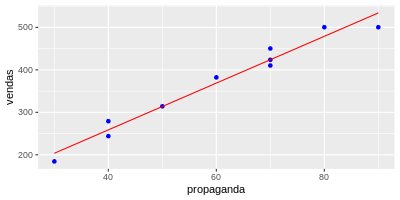

In [ ]:
# Gerando o gráfico do modelo usando o R

%%R -w 400 -h 200
library(ggplot2)
read.csv("dados.csv") -> dados
ggplot(dados, aes(x=propaganda,y=vendas)) + 
  geom_point(color = 'blue') + 
  geom_line(aes(y=vendas_hat), color='red')

In [ ]:
## medir o erro

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae 

mse(dados[['vendas_hat']], dados[['vendas']]) 

365.781429411764

In [ ]:
mae(dados[['vendas_hat']], dados[['vendas']])

16.35999999999999

### Modelo de regressão múltipla Polinomial:

In [ ]:
# Obtendo um novo dataset:

site  = "https://raw.githubusercontent.com/"
diretorio = "gustavomirapalheta/classes_datasets/master/"
arquivo = "retorno_pl_risco.csv"
origem = site + diretorio + arquivo

dados2 = pd.read_csv(origem, sep=";", decimal=",")
dados2.head()


,pl,risco,retorno
0,7.4,1.0,7.6
1,11.1,1.3,13.0
2,8.7,1.1,8.9
3,11.2,1.2,10.9
4,11.6,1.7,12.1


In [ ]:
# regressão múltipla (tentar prever uma ação através de 2 critérios (pl e risco))


from sklearn.linear_model import LinearRegression
modelo1 = LinearRegression()
modelo1.fit(dados2[['pl', 'risco']], dados2[['retorno']])
dados2['ret_hat1'] = modelo1.predict(dados2[['pl', 'risco']])
dados2.to_csv("dados2.csv")

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae 

mse1 = mse(dados2[['ret_hat1']], dados2[['retorno']]) 
mae1 = mae(dados2[['ret_hat1']], dados2[['retorno']])

mse1, mae1

(1.206570030588191, 0.8831840047402594)

In [ ]:
modelo1.intercept_, modelo1.coef_

(array([-3.00930029]), array([[1.15365174, 1.62123397]]))

O modelo desenvolvido foi: $$Ret_{hat} = \beta_0 + \beta_1$$

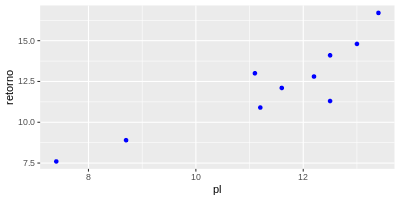

In [ ]:
# Observando a distribuição dos pontos:

%%R -w 400 -h 200
library(ggplot2)
read.csv("dados2.csv") -> dados2
ggplot(dados2, aes(x=pl,y=retorno)) +   geom_point(color = 'blue')


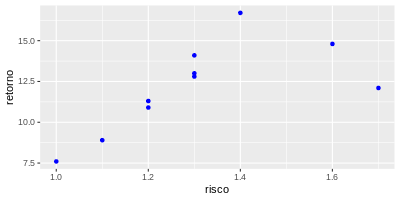

In [ ]:

%%R -w 400 -h 200
ggplot(dados2, aes(x=risco,y=retorno)) +   geom_point(color = 'blue')


Vamos tentar o ajuste do seguinte modelo: $$Ret_{hat} = \beta_0 + \beta_1.pl + \beta_2.risco + \beta_3.{pl}^2 + \beta_4.pl.risco + \beta_5.{risco}^2$$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poli2 = PolynomialFeatures(degree=2, include_bias=False)
X = poli2.fit_transform(dados2[['pl', 'risco']]); X

array([[  7.4 ,   1.  ,  54.76,   7.4 ,   1.  ],
       [ 11.1 ,   1.3 , 123.21,  14.43,   1.69],
       [  8.7 ,   1.1 ,  75.69,   9.57,   1.21],
       [ 11.2 ,   1.2 , 125.44,  13.44,   1.44],
       [ 11.6 ,   1.7 , 134.56,  19.72,   2.89],
       [ 12.2 ,   1.3 , 148.84,  15.86,   1.69],
       [ 12.5 ,   1.2 , 156.25,  15.  ,   1.44],
       [ 12.5 ,   1.3 , 156.25,  16.25,   1.69],
       [ 13.  ,   1.6 , 169.  ,  20.8 ,   2.56],
       [ 13.4 ,   1.4 , 179.56,  18.76,   1.96]])

In [ ]:
from sklearn.linear_model import LinearRegression
modelo2 = LinearRegression(fit_intercept=True)
modelo2.fit(X, dados2[['retorno']])
modelo2.intercept_, modelo2.coef_

(array([-61.15265818]),
 array([[ -8.92885713, 171.0031451 ,   0.47302741,  -1.23139945,
         -53.04223498]]))

Vamos calcular as previsões

In [ ]:
dados2['Ret_hat2'] = modelo2.predict(X)
dados2.head()

,pl,risco,retorno,ret_hat1,Ret_hat2
0,7.4,1.0,7.6,7.149,7.525
1,11.1,1.3,13.0,11.904,12.912
2,8.7,1.1,8.9,8.811,9.108
3,11.2,1.2,10.9,11.857,10.454
4,11.6,1.7,12.1,13.129,12.053


In [ ]:
dados2.drop(['Ret_hat2'], axis=1, inplace=True)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae 

mse2 = mse(dados2[['Ret_hat2']], dados2[['retorno']]) 
mae2 = mae(dados2[['Ret_hat2']], dados2[['retorno']])

mse2, mae2

(0.08776813819233455, 0.2355501168783606)

**Modelo de Regressão Linear Múltipla com Variáveis Categóricas de Entrada**

In [ ]:
# Obtendo um novo dataset:

site  = "https://raw.githubusercontent.com/"
diretorio = "gustavomirapalheta/classes_datasets/master/"
arquivo = "salary.csv"
origem = site + diretorio + arquivo

dados3 = pd.read_csv(origem, sep=";", decimal=",")
dados3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
dados3.columns.to_list()

['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary']

In [ ]:
# Selecionando apenas as variáveis de entrada:

var_inputs = dados3.columns.to_list()
var_inputs.remove('Salary')
var_inputs

['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [ ]:
# Valores da variável de saída

var_outut = ['Salary']
var_outut

['Salary']

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(dados3[var_inputs], dados3[var_outut])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pd.set_option('precision', 2)
coeficientes = pd.DataFrame({'coef':['Intercepto'] + var_inputs,
                             'valor':list(modelo.intercept_) + list(modelo.coef_[0])})
coeficientes

,coef,valor
0,Intercepto,11410.15
1,Sex,1241.79
2,Rank,5586.18
3,Year,482.86
4,Degree,-1331.64
5,YSdeg,-128.79


*!!! Parei aqui!!! verificar material do professor*